# Analyse exploratoire en Python

In [4]:
import pandas as pd # Manipulation de données tabulaires
import matplotlib.pyplot as plt # Génération de graphiques
import seaborn as sns # Génération de graphiques complexes

Pour les représentations graphiques nous allons montrer plusieurs façon de faire :

* En utilisant la bibliothèque `matplotlib`
* En utilisant les fonctionnalité de dessin de la bibliothèque `pandas`
* En utilisant la bibliothèque `seaborn`

La bibliothèque **`pandas`** est la principale bibliothèque de manipulation de données tabulaires en Python. Elle est compatible avec la bibliothèque `numpy`, de calcul numérique. Cette dernière étant particulièrement efficaces pour la manipulation des tableaux multi-dimensionnels. La bibliothèque `pandas` fournit également des fonctionnalité pour généré des graphiques. Ces fonctionnalités reposent en interne sur la bibliothèque `matplotlib`.

La bibliothèque **`matplotlib`** est un des principaux outils pour la génération de graphiques scientifiques en Python. Elle est particulièrement adaptée à la génération de graphiques simples pour lesquels elle dispose d'une API dédiées. 

Pour la génération de figure plus complexes mais d'usage courant, on pourra utiliser la bibliothèque **`seaborn`**. elle repose également sur **`matplotlib`**.

Puisque tous ces outils repose sur `matplotlib`, il est possible de rafiner les graphiques en utilisant l'API de cette dernière.

## Données de réussites d'élèves

Il s'agit de données artificielles générées sur [ce site](http://roycekimmons.com/tools/generated_data/exams).

In [5]:
df_students = pd.read_csv("../../data/StudentsPerformance.csv")
df_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Analyse descriptive

Graphique baton et comptage :

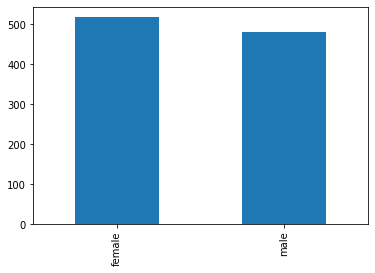

In [6]:
df_students["gender"].value_counts().plot.bar();

Camembert :

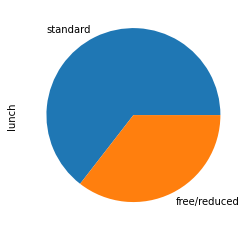

In [7]:
df_students["lunch"].value_counts().plot.pie();

Graphique bâton et valeures moyenne en fonction du genre et des réductions pour les repas. On utilise `seaborn` pour analyser selon deux variables catégorielles :

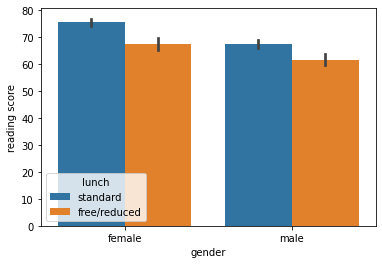

In [8]:
sns.barplot(x="gender", y="reading score", hue="lunch", data=df_students);

KDE par genre :

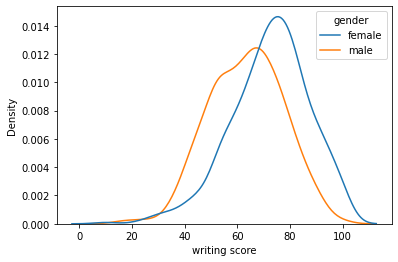

In [9]:
sns.kdeplot(x="writing score", hue="gender", data=df_students);

Graphique violon + box plot par genre :

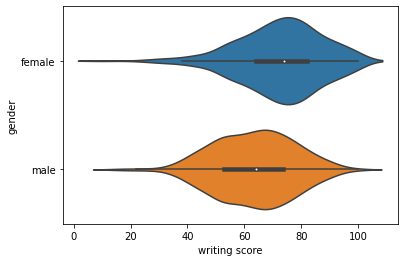

In [10]:
sns.violinplot(x="writing score", y="gender", data=df_students);

Boîtes à moustache uniquement

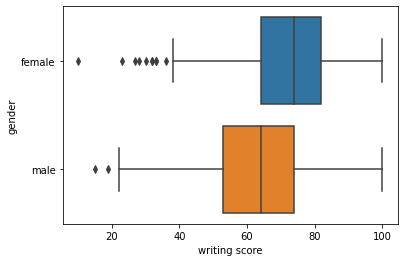

In [11]:
sns.boxplot(x="writing score", y="gender", data=df_students);

Scatter plots avec informations additionelles utilisant :

* la couleur,
* la taille,
* la forme

des marqueurs.

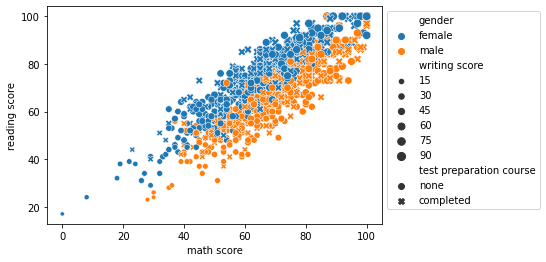

In [12]:
sns.scatterplot(x="math score", y="reading score",
                hue="gender", size="writing score",
                style="test preparation course",
                data=df_students)
plt.legend(bbox_to_anchor=(1, 1));

KDE plots en deux dimensions :

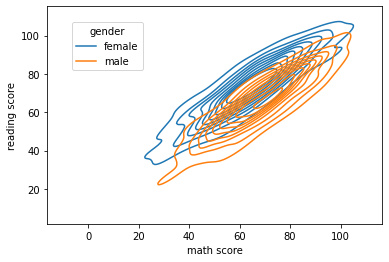

In [41]:
ax = sns.kdeplot(x="math score", y="reading score", hue="gender", data=df_students)
ax.legend_.set_bbox_to_anchor((0.3, 0.95))

Histogramme 2D

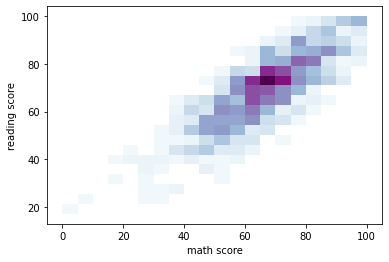

In [44]:
sns.histplot(x="math score", y="reading score", bins=20, data=df_students, cmap="BuPu");

Histogramme 2D à bin hexagonaux :

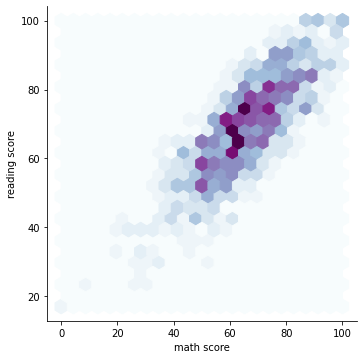

In [14]:
g = sns.jointplot(x="math score", y="reading score", kind="hex", bins=20, data=df_students, cmap="BuPu")
g.ax_marg_x.remove()  # On n'affiche pas les distributions marginales
g.ax_marg_y.remove();

## Les chiffres manuscrits

In [16]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Distribution des différents chiffres :

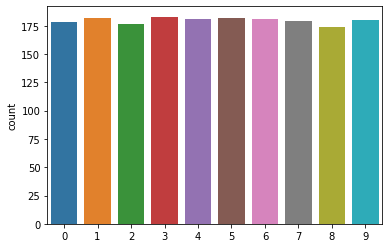

In [18]:
sns.countplot(x=digits["target"]);

Petites interface d'exploration des images. On ajoute la possibilité de lisser le rendu de sorte à rendre l'image plus agréable à l'œil. Ceci n'ajoute aucune information.

In [20]:
from ipywidgets import widgets, interact

@interact(
    i=widgets.IntSlider(min=0, max=len(digits.images) - 11, continuous_update=False),
    smooth=False
)
def plot_img(i, smooth):
    plt.figure(figsize=(14, 5))
    for j in range(10):
        plt.subplot(1, 10, j + 1)
        plt.title(f"{digits['target'][i + j]}")
        plt.imshow(digits["images"][i + j], cmap="gray", interpolation="bicubic" if smooth else None)
        plt.xticks([])
        plt.yticks([])
    

interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=1786), Checkbox(value=F…

### Réduction de dimension

#### Analyse en composante principale

Applaction d'une Analyse en composante principale. On demande toutes les dimensions de sorte qu'il soit possible
d'analyser le nombre de dimensions intrinsèques :

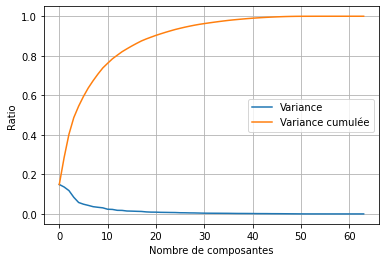

In [22]:
from sklearn.decomposition import PCA

X = digits["data"]
y = digits["target"]
pca = PCA(n_components=X.shape[1])
pca.fit(X)
plt.plot(pca.explained_variance_ratio_, label="Variance")
plt.plot(pca.explained_variance_ratio_.cumsum(), label="Variance cumulée")
plt.xlabel("Nombre de composantes")
plt.ylabel("Ratio")
plt.legend()
plt.grid("on");

Les images continenne 64 pixels, mais on voit que à partir de 40, presque toutes la variance totale est reproduite.

Projection sur les deux premiers axes principaux :

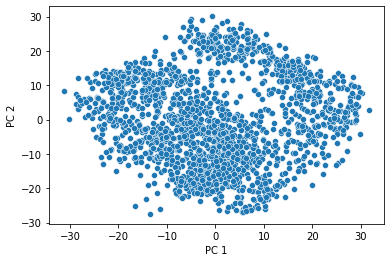

In [23]:
Xpca = pca.transform(X)
sns.scatterplot(x=Xpca[:, 0], y=Xpca[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2");

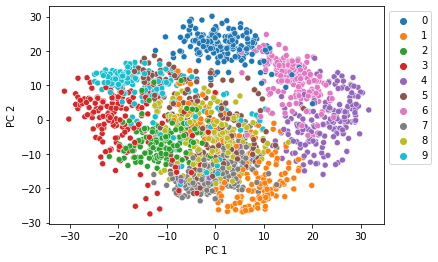

In [24]:
sns.scatterplot(x=Xpca[:, 0], y=Xpca[:, 1], hue=y, palette="tab10")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("PC 1")
plt.ylabel("PC 2");

Clairement la projection linéaire sur les deux premiers axes principaux n'est pas suffisante pour distinguer les groupes naturels.

Les deux premiers axes principaux supportent moins de 30% de la variance totale :

In [26]:
pca.explained_variance_ratio_[:2].sum()

0.28509364823699307

Dans une certaine mesure, la réduction de dimension par ACP, peut être vue comme un algorithme de débruitage. En effet, les composantes principales d'ordres élevé capture de plus en plus les détails des images. Eliminer les détails les plus fins peut alors aider l'analyse.

In [33]:
from ipywidgets import widgets, interact

images_comp = pca.components_.reshape(-1, 8, 8)

@interact(
    i=widgets.IntSlider(min=0, max=len(images_comp) - 11, continuous_update=False),
    smooth=False
)
def plot_img(i, smooth):
    plt.figure(figsize=(14, 5))
    for j in range(10):
        plt.subplot(1, 10, j + 1)
        plt.title(f"PC {i + j + 1}")
        plt.imshow(images_comp[i + j], cmap="gray", interpolation="bicubic" if smooth else None)
        plt.xticks([])
        plt.yticks([])
    

interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=53), Checkbox(value=Fal…

On peut effectuer une projection inverse et examiner le résultat après filtrage des composantes principales non-conservées :

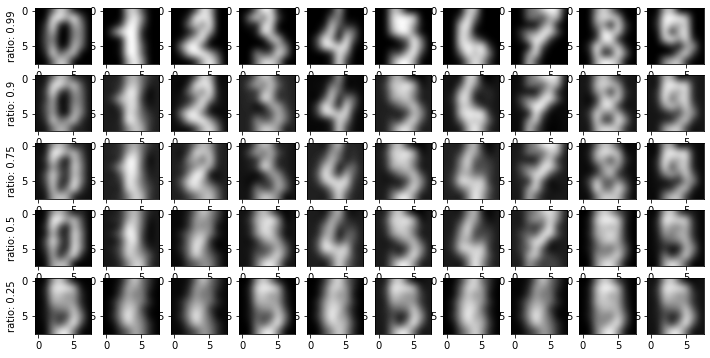

In [42]:
variances = [0.99, 0.9, 0.75, 0.5, 0.25]

plt.figure(figsize=(12, 6))

for i, variance in enumerate(variances):
    pca_ = PCA(n_components=variance)
    Xpca = pca_.fit_transform(digits.data[:10])
    X_inv = pca_.inverse_transform(Xpca)
    for j in range(10):
        plt.subplot(len(variances), 10, 10 * i + j + 1)
        if j == 0:
            plt.ylabel(f"ratio: {variance}")
        plt.imshow(X_inv[j].reshape(8, 8), cmap="gray", interpolation="bicubic")
        

On voit qu'il faut des niveaux de "compression" élevés pour observer une perten d'information notable.

#### t-SNE

Utilisation de t-SNE pour effectuer une réduction de dimension non-linéaire :

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(2, learning_rate="auto", init="pca", random_state=1)
Xtsne = tsne.fit_transform(X)

/home/amignon/Projets/upec-introduction-to-ai/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


L'algorithme t-SNE ne permet pas de projeter de nouveaux points (non-utilisé à l'entrainement), donc seule la méthode `fit_transform` est disponible et non pas la méthode `transform` seule.

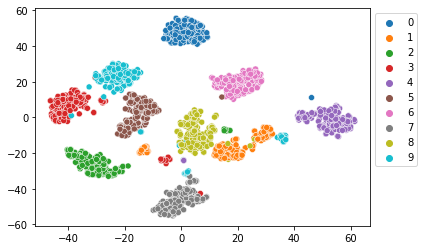

In [102]:
sns.scatterplot(x=Xtsne[:, 0], y=Xtsne[:, 1], hue=y, palette="tab10");
plt.legend(bbox_to_anchor=(1, 1));

### Clustering avec les K-Moyennes

On commence par appliquer une réduction de dimension par PCA pour :

* faciliter le calcul des distances, plus compliqué en grandes dimensions
* débruiter les images

In [28]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("pca", PCA(n_components=0.9)),
    ("kmeans", KMeans(n_clusters=10, random_state=1))
])

model.fit(X)

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=10, random_state=1))])

On peut ensuite visualiser le centroïde de chaque cluster en moyennant toutes les images de chaque cluster :

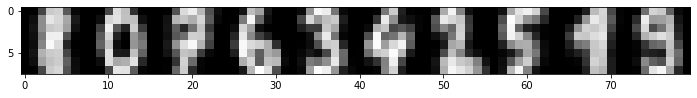

In [123]:
import numpy as np

cluster = model.predict(X)

img_centers = np.hstack([
    digits["images"][cluster == i].mean(0)
    for i in range(10)
])

plt.figure(figsize=(12, 5))
plt.imshow(img_centers, cmap="gray");

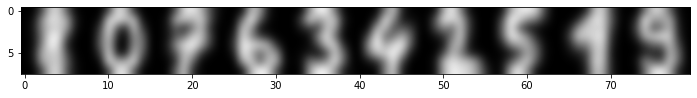

In [124]:
plt.figure(figsize=(12, 5))
plt.imshow(img_centers, cmap="gray", interpolation="bicubic");

On voit que, naturellement, les clusters sont centrés sur les groupes corre chiffres